 # Libraries


In [262]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Datasets

In [263]:
train_dir = '.../train.csv'
test_dir = '.../test.csv'

train_set = pd.read_csv(train_dir)
train_set.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Quick look at the data

# Dataset Statistics

In [264]:
# See datasets statistics
train_set.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hirvonen, Miss. Hildur E",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [265]:
# Check the balance of the dataset and visualize

# Survivors
no_of_survivors = train_set.loc[train_set.Survived==1].shape[0]

# Victims
no_of_victims = train_set.loc[train_set.Survived==0].shape[0]

print('Number of actual Survivors in training set: {}'.format(no_of_survivors))
print('Number of actual Victims in training set: {}'.format(no_of_victims))
print('Total number of passengers: {}'.format(train_set.shape[0]))

Number of actual Survivors in training set: 342
Number of actual Victims in training set: 549
Total number of passengers: 891


In [266]:
# Check for NaNs
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualise Dataset

Visualise data for Survivors:

[Text(0.5, 0, 'Embarked')]

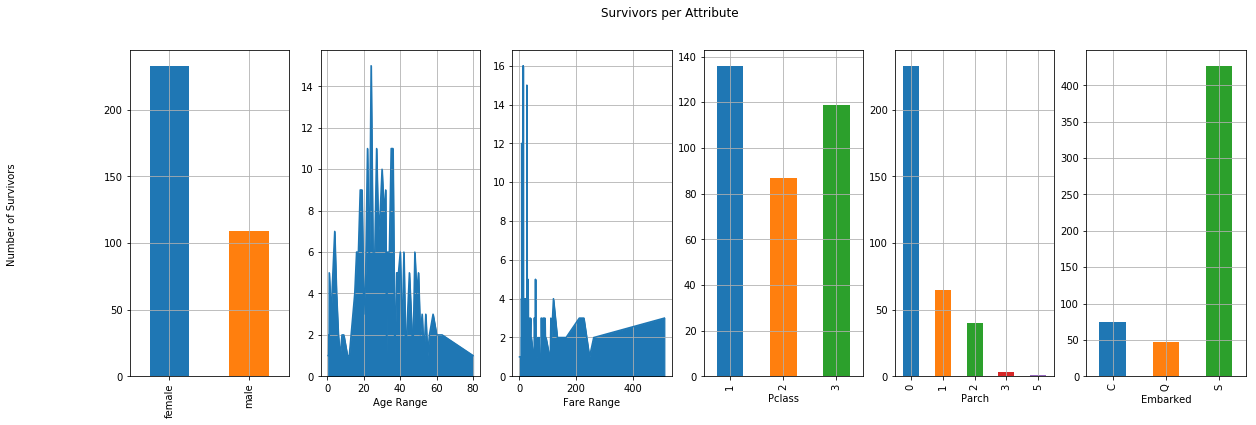

In [267]:
# # Visualise for each variable the number of the survivors and number of victims.
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize = (20,6))
fig.suptitle('Survivors per Attribute')
fig.text(0.04, 0.5, 'Number of Survivors', va='center', rotation='vertical')

# Sex
train_set['Sex'].loc[train_set.Survived ==1 ].value_counts().sort_index().plot(ax = ax1, grid = True, kind = 'bar')#.bar()
# Age
train_set['Age'].loc[train_set.Survived ==1 ].value_counts().sort_index().plot(ax = ax2,  grid = True,  kind = 'area')
ax2.set(xlabel = 'Age Range')
# Fare
train_set['Fare'].loc[train_set.Survived ==1 ].value_counts().sort_index().plot(ax = ax3,  grid = True,  kind = 'area')
ax3.set(xlabel = 'Fare Range')
# Pclass
train_set['Pclass'].loc[train_set.Survived ==1 ].value_counts().sort_index().plot(ax = ax4,  grid = True,  kind = 'bar')
ax4.set(xlabel = 'Pclass')
# Parch
train_set['Parch'].loc[train_set.Survived ==1 ].value_counts().sort_index().plot(ax = ax5,  grid = True,  kind = 'bar')
ax5.set(xlabel = 'Parch')
# Embarked
train_set['Embarked'].loc[train_set.Survived ==0 ].value_counts().sort_index().plot(ax = ax6,  grid = True,  kind = 'bar')
ax6.set(xlabel = 'Embarked')

Visualise data for Victims:

[Text(0.5, 0, 'Embarked')]

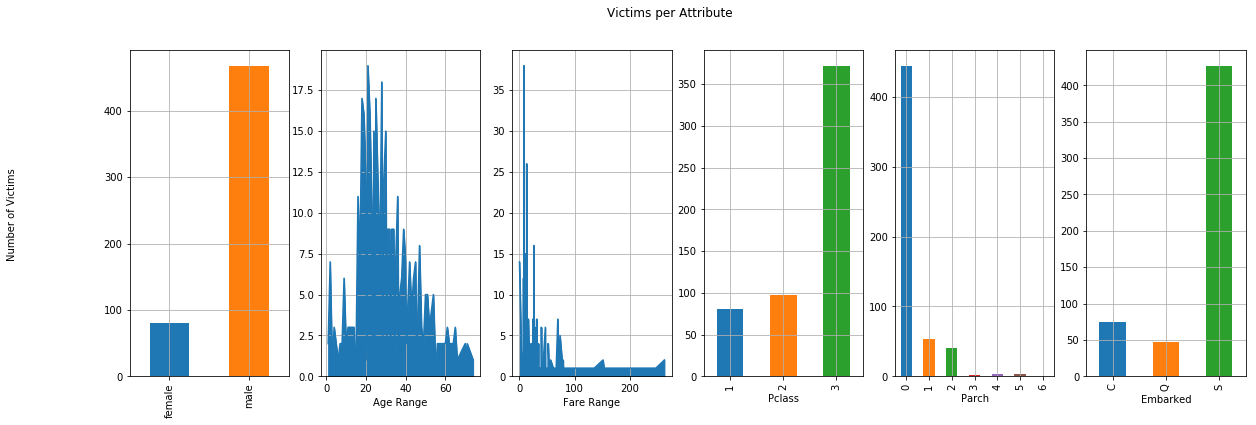

In [268]:
# # Visualise for each variable the number of the survivors and number of victims.
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize = (20,6))
fig.suptitle('Victims per Attribute')
fig.text(0.04, 0.5, 'Number of Victims', va='center', rotation='vertical')

# Sex
train_set['Sex'].loc[train_set.Survived ==0 ].value_counts().sort_index().plot(ax = ax1, grid = True, kind = 'bar')#.bar()
# Age
train_set['Age'].loc[train_set.Survived ==0].value_counts().sort_index().plot(ax = ax2,  grid = True,  kind = 'area')
ax2.set(xlabel = 'Age Range')
# Fare
train_set['Fare'].loc[train_set.Survived ==0 ].value_counts().sort_index().plot(ax = ax3,  grid = True,  kind = 'area')
ax3.set(xlabel = 'Fare Range')
# Pclass
train_set['Pclass'].loc[train_set.Survived ==0 ].value_counts().sort_index().plot(ax = ax4,  grid = True,  kind = 'bar')
ax4.set(xlabel = 'Pclass')
# Parch
train_set['Parch'].loc[train_set.Survived ==0 ].value_counts().sort_index().plot(ax = ax5,  grid = True,  kind = 'bar')
ax5.set(xlabel = 'Parch')
# Embarked
train_set['Embarked'].loc[train_set.Survived ==0 ].value_counts().sort_index().plot(ax = ax6,  grid = True,  kind = 'bar')
ax6.set(xlabel = 'Embarked')

# Missing Data Handling

Solving the issue with the 'Cabin' values, doesn't add any value to the model. So it is droped by the dataset.
We are going to handle the 'Age' missing values:

In [269]:
# Drop the Cabin Column
train_set.drop(['Cabin'], axis =1, inplace = True)

train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Fill with the mean value, taking ino account the  Class and the Sex

In [270]:
# Male - Pclass = 1 
train_set["Age"].loc[(train_set.Sex=='male') & (train_set.Pclass==1) ] = train_set["Age"].fillna(train_set["Age"].loc[(train_set.Sex=='male') & (train_set.Pclass==1) ].mean())
# Male - Pclass = 2
train_set["Age"].loc[(train_set.Sex=='male') & (train_set.Pclass==2) ] = train_set["Age"].fillna(train_set["Age"].loc[(train_set.Sex=='male') & (train_set.Pclass==2) ].mean())
# Male - Pclass = 3 
train_set["Age"].loc[(train_set.Sex=='male') & (train_set.Pclass==3) ] = train_set["Age"].fillna(train_set["Age"].loc[(train_set.Sex=='male') & (train_set.Pclass==3) ].mean())
# Female - Pclass = 1 
train_set["Age"].loc[(train_set.Sex=='female') & (train_set.Pclass==1) ] = train_set["Age"].fillna(train_set["Age"].loc[(train_set.Sex=='female') & (train_set.Pclass==1) ].mean())
# Female - Pclass = 2 
train_set["Age"].loc[(train_set.Sex=='female') & (train_set.Pclass==2) ] = train_set["Age"].fillna(train_set["Age"].loc[(train_set.Sex=='female') & (train_set.Pclass==2) ].mean())
# Female - Pclass = 3 
train_set["Age"].loc[(train_set.Sex=='female') & (train_set.Pclass==3) ] = train_set["Age"].fillna(train_set["Age"].loc[(train_set.Sex=='female') & (train_set.Pclass==3) ].mean())

/home/andreas/Documents/SKAChallenge/skachallenge_venv/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [271]:
# Fill the Embarked Todo
##train_set["Embarked"].loc[(train_set.Sex=='male')] = train_set["Embarked"].fillna(train_set["Embarked"].loc[(train_set.Sex=='male') ].mean())

train_set["Embarked"].fillna("S", inplace=True)

In [272]:
# Check again for NaNs
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [273]:
# See datasets statistics
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Imbalance "Handling"

Duplicate random rows from the minority class to 'balance' the dataset

In [274]:
# count the difference between classes
diff = abs(no_of_survivors - no_of_victims) 

In [275]:
extra_rows = train_set.loc[train_set.Survived == 1].sample(diff).reset_index(drop = True)

In [276]:
train_set = train_set.append(extra_rows).reset_index(drop = True)

# Encode categorical values and drop unecessary variables

In [277]:
# Drop Names, Ticket
train_set.drop (['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [278]:
# Encode Sex column 
gender = {"male": 0, "female": 1}
train_set['Sex'] = train_set['Sex'].map(gender)
train_set.rename(columns={"Sex": "Female"}, inplace = True)

In [279]:
# Dummy Encode 'Embarked' and 'Class' column
train_set = pd.get_dummies(train_set, columns = ['Embarked', 'Pclass'],  prefix =['Embarked', 'Class'])


# Split the dataset to dependent and indipendent variables


In [280]:
import sys

In [281]:
X_var = train_set[['Female', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C','Embarked_Q', 'Embarked_S', 'Class_1', 'Class_2', 'Class_3']].values
Y_var = train_set['Survived'].values

# Model

In [282]:
# Initialize parameters
a = 0.001
# Iterations number
no_of_iter = 20000

# Initialize Weights
W = np.random.uniform(low=-0.01, high=0.01, size=(X_var.shape[1]))

N = X_var.shape[0]

print(W)

[ 0.00322019  0.00705361  0.00568248 -0.00119973 -0.00070294  0.0029759
 -0.00429406 -0.000632   -0.00100502 -0.00123801  0.00848183]


In [283]:
# Sigmoid Function
def Sigmoid_F(x_var, w):
    x_w = np.dot(x_var, w)
    return 1 / (1 + np.exp(-x_w))

def Loss(Y_var, sig_Y):
    return (-(Y_var*np.log(sig_Y)) -  ((1 - Y_var) * np.log(1 - sig_Y))).mean()

def Loss_derivative(sig_y, truth_y, x_matrix, N=N):
    dY =  sig_y - truth_y 

    return np.dot(dY, x_matrix)/N

# Training

In [284]:
# Gradient Descent
for ii in range(no_of_iter):
    # Sigmoid function output
    sig_Y = Sigmoid_F(X_var, W)
    # Loss Function
    L = Loss(Y_var, sig_Y)
    # Gradient computation
    dw = Loss_derivative(sig_y = sig_Y, truth_y = Y_var, x_matrix = X_var)
    # Update weights
    W = W - a * dw
    
print('Final Loss: ', L)

   

Final Loss:  0.49591669421351864


# Test set Preprocessing




In [285]:
# Read the test set
test_set = pd.read_csv(test_dir)

In [286]:
# Clean dataset 
test_set.drop (['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [287]:
test_set.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

# Fill the missing values

In [288]:
# Male - Pclass = 1 
test_set["Age"].loc[(test_set.Sex=='male') & (test_set.Pclass==1) ] = test_set["Age"].fillna(test_set["Age"].loc[(test_set.Sex=='male') & (test_set.Pclass==1) ].mean())
# Male - Pclass = 2
test_set["Age"].loc[(test_set.Sex=='male') & (test_set.Pclass==2) ] = test_set["Age"].fillna(test_set["Age"].loc[(test_set.Sex=='male') & (test_set.Pclass==2) ].mean())
# Male - Pclass = 3 
test_set["Age"].loc[(test_set.Sex=='male') & (test_set.Pclass==3) ] = test_set["Age"].fillna(test_set["Age"].loc[(test_set.Sex=='male') & (test_set.Pclass==3) ].mean())
# Female - Pclass = 1 
test_set["Age"].loc[(test_set.Sex=='female') & (test_set.Pclass==1) ] = test_set["Age"].fillna(test_set["Age"].loc[(test_set.Sex=='female') & (test_set.Pclass==1) ].mean())
# Female - Pclass = 2 
test_set["Age"].loc[(test_set.Sex=='female') & (test_set.Pclass==2) ] = test_set["Age"].fillna(test_set["Age"].loc[(test_set.Sex=='female') & (test_set.Pclass==2) ].mean())
# Female - Pclass = 3 
test_set["Age"].loc[(test_set.Sex=='female') & (test_set.Pclass==3) ] = test_set["Age"].fillna(test_set["Age"].loc[(test_set.Sex=='female') & (test_set.Pclass==3) ].mean())

# Fare
test_set["Fare"] = test_set["Fare"].fillna(test_set["Fare"].mean())


In [289]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Encode

In [290]:
# Encode Sex column 
gender = {"male": 0, "female": 1}
test_set['Sex'] = test_set['Sex'].map(gender)
test_set.rename(columns={"Sex": "Female"}, inplace = True)

# Dummy Encode 'Embarked' and 'Class' column
test_set = pd.get_dummies(test_set, columns = ['Embarked', 'Pclass'],  prefix =['Embarked', 'Class'])

In [291]:
# Set as index the PassengerId column
test_set.set_index('PassengerId', inplace = True)

In [292]:
# Predicted survivors PassengerId list
predictions =pd.DataFrame(columns = ['PassengerId', 'Predicted_as_Survivor'])
# Loop over the test set
for index, row in test_set.iterrows():
    prob = Sigmoid_F(row.tolist(), W)    
    if prob> 0.5:
        predictions = predictions.append({'PassengerId':index, 'Predicted_as_Survivor': 1  }, ignore_index=True )
    elif prob <= 0.5:
        predictions = predictions.append({'PassengerId':index, 'Predicted_as_Survivor': 0  }, ignore_index=True )
    
    

In [293]:
# Quick look at the dataset
predictions.head()

,PassengerId,Predicted_as_Survivor
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [294]:
ground_truth = pd.read_csv('.../gender_submission.csv')

In [295]:
# Merge Truth and the prediction df
merged_df = pd.merge(predictions.astype(int), ground_truth, on='PassengerId')

In [296]:
# Metrics
TP = merged_df.loc[(merged_df.Predicted_as_Survivor == 1) & (merged_df.Survived == 1)].shape[0]
TN = merged_df.loc[(merged_df.Predicted_as_Survivor == 0) & (merged_df.Survived == 0)].shape[0]
FP = merged_df.loc[(merged_df.Predicted_as_Survivor == 1) & (merged_df.Survived == 0)].shape[0]
FN = merged_df.loc[(merged_df.Predicted_as_Survivor == 0) & (merged_df.Survived == 1)].shape[0]

# Confusion Matrix
confusion_matrix = np.asarray([[TP, FP], [FN,TN]])

In [297]:
metrics_string = 'True Positives {}  True Negatives {}  False Positives {}  False Negatives {}'

print(metrics_string.format(TP, TN, FP, FN))

True Positives 146  True Negatives 230  False Positives 36  False Negatives 6


# Visualize Confusion Matrix

In [298]:
def confusion_matrix_visualization(confusion_matrix):
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(confusion_matrix.shape[1]),
           yticks=np.arange(confusion_matrix.shape[0]),
           xticklabels=['Predicted_Survivors', 'Predicted_Victims'],  
           yticklabels=['Survivors', 'Victims'],
           title = 'Confusion Matrix' )
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(j, i, confusion_matrix[i, j], size = 18, horizontalalignment='center', verticalalignment='center')

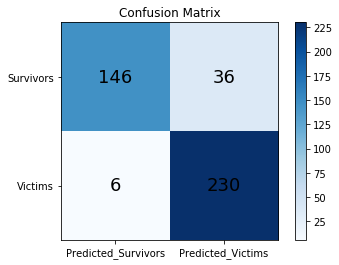

In [299]:
# Visualize confusion matrix
confusion_matrix_visualization(confusion_matrix = confusion_matrix)

# Evaluation Metrics

In [300]:
# Precision
Precision = TP/(TP + FP)
# Recall
Recall = TP/(TP + FN)

print('Precision {}  Recall {}'.format(Precision, Recall ))

Precision 0.8021978021978022  Recall 0.9605263157894737


# Sci-kit

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

scikit_Y = train_set['Survived']
scikit_X = train_set.drop('Survived', axis = 1 )

X_train, X_test, y_train, y_test = train_test_split(scikit_X, scikit_Y, test_size=0.3)

In [302]:
model = LogisticRegression(max_iter = no_of_iter, tol=0.00001)
model.fit(scikit_X, scikit_Y)

/home/andreas/Documents/SKAChallenge/skachallenge_venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=1e-05, verbose=0, warm_start=False)

In [303]:
model_out = model.predict(test_set)

In [304]:
prediction_df = pd.DataFrame({'PassengerId':test_set.index, 'Predicted_as_Survivor':pred})

In [305]:
# Merge dataframes
merged_df_scikit = pd.merge(prediction_df, ground_truth, on='PassengerId')
merged_df_scikit.head()

# Metrics
TP_scikit = merged_df_scikit.loc[(merged_df_scikit.Predicted_as_Survivor == 1) & (merged_df_scikit.Survived == 1)].shape[0]
TN_scikit = merged_df_scikit.loc[(merged_df_scikit.Predicted_as_Survivor == 0) & (merged_df_scikit.Survived == 0)].shape[0]
FP_scikit = merged_df_scikit.loc[(merged_df_scikit.Predicted_as_Survivor == 1) & (merged_df_scikit.Survived == 0)].shape[0]
FN_scikit = merged_df_scikit.loc[(merged_df_scikit.Predicted_as_Survivor == 0) & (merged_df_scikit.Survived == 1)].shape[0]

# Confusion Matrix
confusion_matrix_scikit = np.asarray([[TP_scikit, FP_scikit], [FN_scikit,TN_scikit]])

metrics_string_scikit = 'True Positives {}  True Negatives {}  False Positives {}  False Negatives {}'

print(metrics_string_scikit.format(TP_scikit, TN_scikit, FP_scikit, FN_scikit))

True Positives 147  True Negatives 225  False Positives 41  False Negatives 5


# Visualize Confusion Matrix

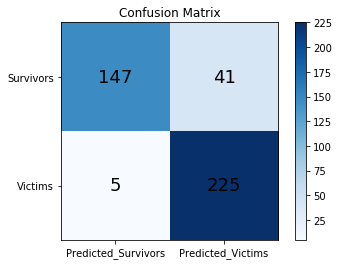

In [306]:
confusion_matrix_visualization(confusion_matrix = confusion_matrix_scikit)

In [307]:
# Precision
Precision_scikit = TP_scikit/(TP_scikit + FP_scikit)
# Recall
Recall_scikit = TP_scikit/(TP_scikit + FN_scikit)


print('Precision {}  Recall {}'.format(Precision_scikit, Recall_scikit ))

Precision 0.7819148936170213  Recall 0.9671052631578947
